# Chronos Usage Example

## Loading Chronos Model

In [1]:
import os 
import sys
import torch
import numpy as np

src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

from tsfmproject.model import ChronosModel
from tsfmproject.dataset import ChronosDataset
# from tsfmproject.utils import load_args

# arg_path = "../config/timesfm.json"
# args = load_args(arg_path)
repo = "amazon/chronos-t5-small"
chronos_model = ChronosModel(repo=repo)


Loading Chronos model from Huggingface repository


## Define the datasets

In [2]:
val_dataset = ChronosDataset(name="ett", datetime_col='date', path='../src/tsfmproject/models/moment/data/ETTh1.csv', 
                             mode='test', batch_size=8)

## Evaluate the zero-shot forecasting

/nethome/sli999/TSFMProject/src/tsfmproject/model.py:223: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_seq = torch.tensor(input_seq)


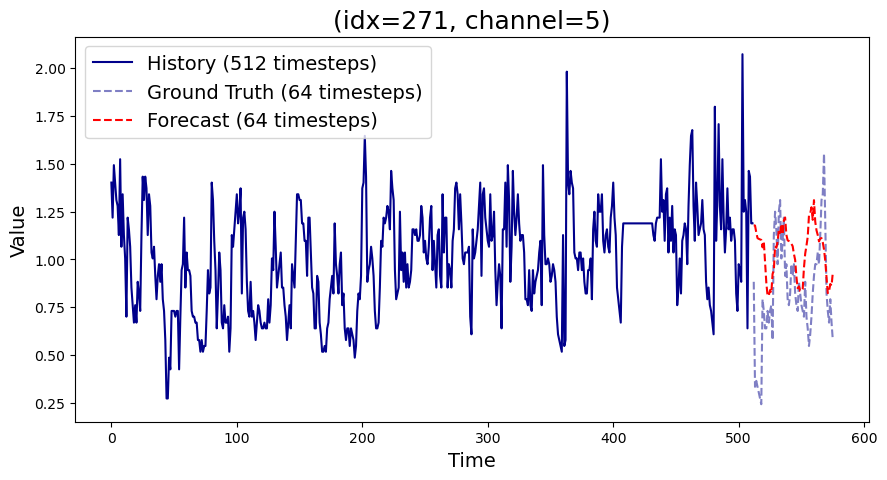

In [3]:
chronos_model.plot(val_dataset, horizon_len=64, quantile_levels=[0.1, 0.5, 0.9])